table of contents[「Delving deeper into the tracking data with python: measuring the physical performance of players.」](https://www.youtube.com/watch?v=VX3T-4lB2o0)  
1. Prepare  
2. Read Dataset, and Preprocess  
3. Distance Covered  
4. Labeling  
5. Plot trajectories

# Prepare

## Import Library

In [1]:
import os, time, sys
from datetime import datetime, date
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cmap = plt.get_cmap('tab10')
%matplotlib inline

sys.path.append(os.path.join('..','src'))
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel

## Setting static parameters

In [2]:
base_dir = os.path.join('..')
data_dir = os.path.join(base_dir, '..', 'sample-data', 'data')

game_id = 2

# Read Dataset, and Preprocess

## Read dataset

In [3]:
events_df = mio.read_event_data(data_dir, game_id)
tracking_home_df = mio.tracking_data(data_dir, game_id, 'Home')
tracking_away_df = mio.tracking_data(data_dir, game_id, 'Away')

Reading team: home
Reading team: away


## Convert Positionts

In [4]:
events_df = mio.to_metric_coordinates(events_df)
tracking_home_df = mio.to_metric_coordinates(tracking_home_df)
tracking_away_df = mio.to_metric_coordinates(tracking_away_df)

## rebase direction

In [5]:
tracking_home_df, tracking_away_df, events_df = mio.to_single_playing_direction(tracking_home_df, tracking_away_df, events_df)

## check data

In [6]:
events_df.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [7]:
tracking_home_df.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tracking_away_df.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


## Calculate Player Velocities

In [9]:
tracking_home_df = mvel.calc_player_velocities(tracking_home_df, smoothing=True, filter_='moving average')
tracking_away_df = mvel.calc_player_velocities(tracking_away_df, smoothing=True, filter_='moving average')

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c230c7550>)

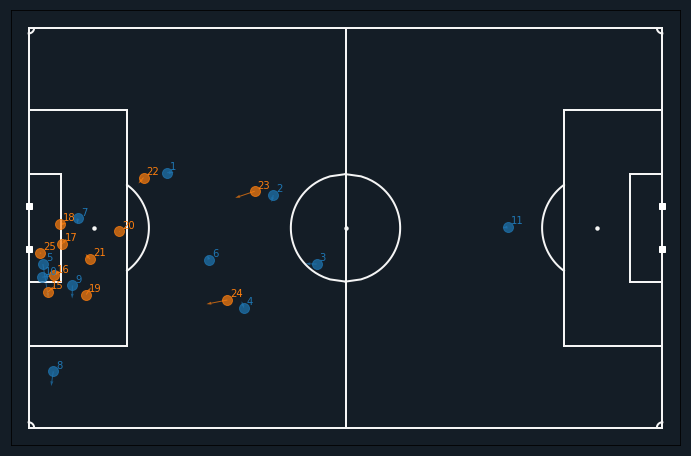

In [10]:
mviz.plot_frame(tracking_home_df.iloc[10000,:], tracking_away_df.iloc[10000,:], mviz.plot_pitch(field_color='twitter_dark_mode'), team_colors=(cmap(0), cmap(1)), include_player_velocities=True, annotate=True)

In [11]:
mviz.save_match_clip(tracking_home_df.iloc[73600:73600+500],tracking_away_df.iloc[73600:73600+500],
fpath=os.path.join(base_dir,'reports','movie'), fname='home_goal_2',figax=mviz.plot_pitch(field_color='twitter_dark_mode'),team_colors=[cmap(0), cmap(1)],include_player_velocities=True)

Generating movie...done


# Distance Covered

## Aggregation

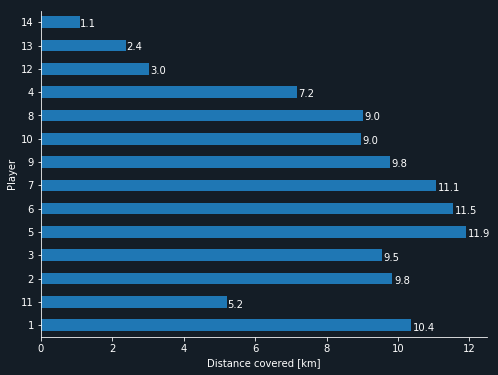

In [19]:
# make a simple bar chart of distance covered for each player
# set matplotlib properties
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# instance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

# set color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

twitter_color = '#141d26'
fig.patch.set_facecolor(twitter_color)
ax.set_facecolor(twitter_color)

ax = home_summary['Distance [km]'].plot.barh(ax=ax, rot=0, color=cmap(0))
ax.set_ylabel('Player')
ax.set_xlabel('Distance covered [km]')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width() * 1.005, p.get_y() * 1.005), fontsize=10)

## plot

# Labeling

In [21]:
# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2 m/s)
    player_distance = tracking_home_df.loc[tracking_home_df[column] < 2, column].sum()/25./1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home_df.loc[ (tracking_home_df[column] >= 2) & (tracking_home_df[column] < 4), column].sum()/25./1000
    jogging.append( player_distance )
    # running (between 4 and 7 m/s)
    player_distance = tracking_home_df.loc[ (tracking_home_df[column] >= 4) & (tracking_home_df[column] < 7), column].sum()/25./1000
    running.append( player_distance )
    # sprinting (greater than 7 m/s)
    player_distance = tracking_home_df.loc[ tracking_home_df[column] >= 7, column].sum()/25./1000
    sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

## plot

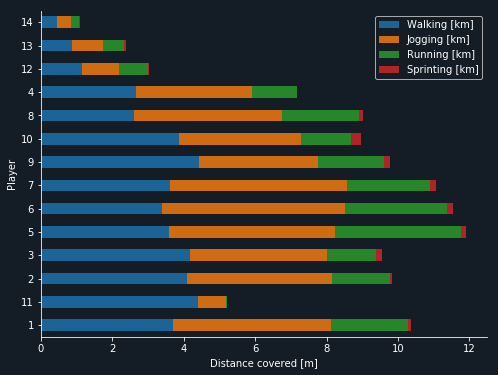

In [30]:
# instance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

# set color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

twitter_color = '#141d26'
fig.patch.set_facecolor(twitter_color)
ax.set_facecolor(twitter_color)

home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]']].plot.barh(ax=ax, stacked=True, alpha=0.8)
ax.set_ylabel('Player'); ax.set_xlabel('Distance covered [m]')
ax.legend(facecolor=twitter_color)

# Plot Trajectory

Text(0.5,1,"Home Number 10's splint")

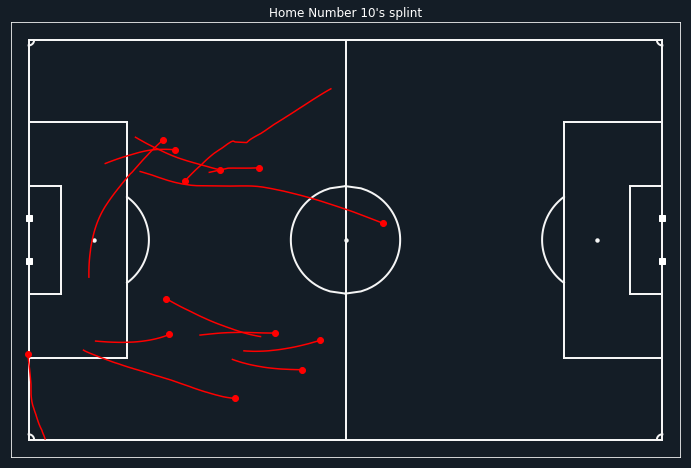

In [33]:
sprint_threshold = 7 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1*25 # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)

player = '10'
column = 'Home_' + player + '_speed' # spped
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position

# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff( 1*( np.convolve( 1*(tracking_home_df[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1
# now plot all the sprints
fig,ax = mviz.plot_pitch(field_color='twitter_dark_mode')
for s, e in zip(player_sprints_start,player_sprints_end):
    ax.plot(tracking_home_df[column_x].iloc[s],tracking_home_df[column_y].iloc[s],'ro')
    ax.plot(tracking_home_df[column_x].iloc[s:e+1],tracking_home_df[column_y].iloc[s:e+1],'r')

ax.set_title('Home Number 10\'s splint')